BUAD 5092 Module 7

Jason Street

# Part 1
## Model Formulation

**Formulate an integer programming optimization model (in Python) that would solve this problem. How many subtour elimination constraints are there?**

**Sets** \
$N$: set of cities \{New York, Los Angeles, Chicago, Houston, Phoenix, Philadelphia, San Antonio, San Diego, Dallas, San Jose, Austin\} \
$A$: set of arcs (routes between cities)

**Parameters** \
$c_{i,j}$: cost (distance) for traveling from city $i$ to city $j$

**Decision Variables** \
$x_{i,j}$: $=1$ if arc ($i$,$j$) is in the tour, $=0$ otherwise \

**Objective Function and Constraints** \
The optimization model is formulated as

\begin{equation*}
\begin{matrix}
\underset{x}{\min} & \underset{(i,j) \in A}{\sum} c_{i,j} x_{i,j} & \\
\textrm{s.t.} & \underset{i:(i,j) \in A}{\sum} x_{i,j} & = & \underset{k:(j,k) \in A}{\sum} x_{j,k}, & \forall j \in N \\
& x_{i,j} & \in & \{0,1\}, & \forall (i,j) \in A \\
& \underset{j:(0,j) \in A}{\sum} x_{0,j} & = & 1 & \\
& \underset{i:(i,0) \in A}{\sum} x_{i,0} & = & 1 & \\
& \underset{i \in S}{\sum} \underset{j \notin S}{\sum} x_{i,j} & \geq & 1, & \forall S \subset N, 2 \leq |S| \leq |N|-1 \\
\end{matrix}
\end{equation*}

the subtour elimination constraints prevents the formation of disconnected tours within any subset of cities.\
there are: $2^{n} - 2 = 2^{11} - 2 = 2048 - 2 = 2046$ subtour elimination constraints.


# Part 2
## Linear Programming Relaxation

**In Excel, setup and solve the relaxed problem, where subtour elimination constraints are dropped and self-loops are eliminated from the set of arcs. In words, describe the solution. For example, what is the total distance in miles and what route does this model have the Globetrotters taking? Why isn’t this solution a viable solution to the business problem? Please include a screenshot of your Excel model in your PDF report.**

Total distance from excel solver is 3684 miles. \
Route is several subtours which are disconnected and do not meet the intent(not viable):\
1 - New York, Philadelphia, Chicago, New York\
2 - Los Angeles, San Jose, Los Angeles\
3 - Houston, Dallas, Houston\
4 - Phoenix, San Diego, Phoenix\
5 - San Antonio, Austin, San Antonio

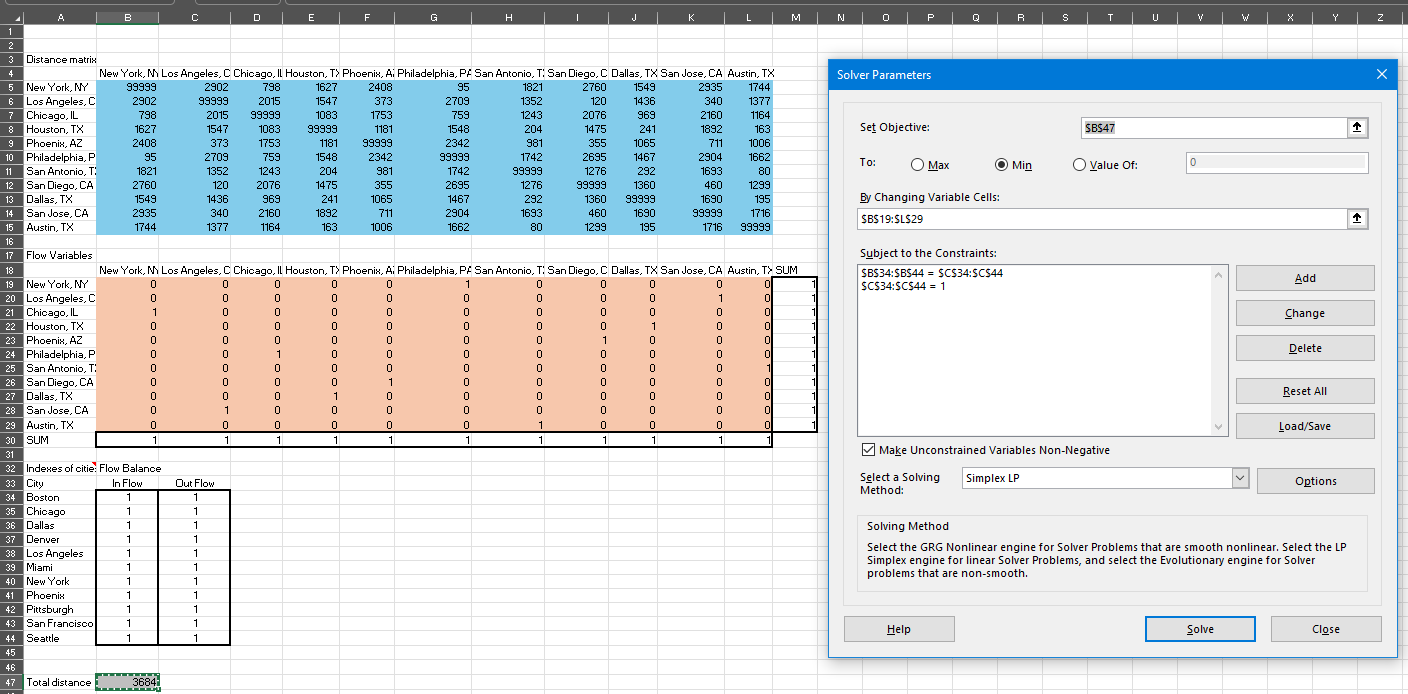

In [1]:
from IPython import display
display.Image("./M7_q2_screenshot.png")

# Part 3
## Heuristic Model (Excel)

**Setup and solve the problem in Excel using the evolutionary solver. What route should the Globetrotters take and how far will they travel? In addition to submitting your completed Excel model file, please include a screenshot of your Excel model in your PDF report.**

Total distance from excel solver is 6800 miles.
Route: New York, Philadelphia, Dallas, Houston, Austin, San Antonio, Phoenix, San Diego, Los Angeles, San Jose, Chicago, New York.

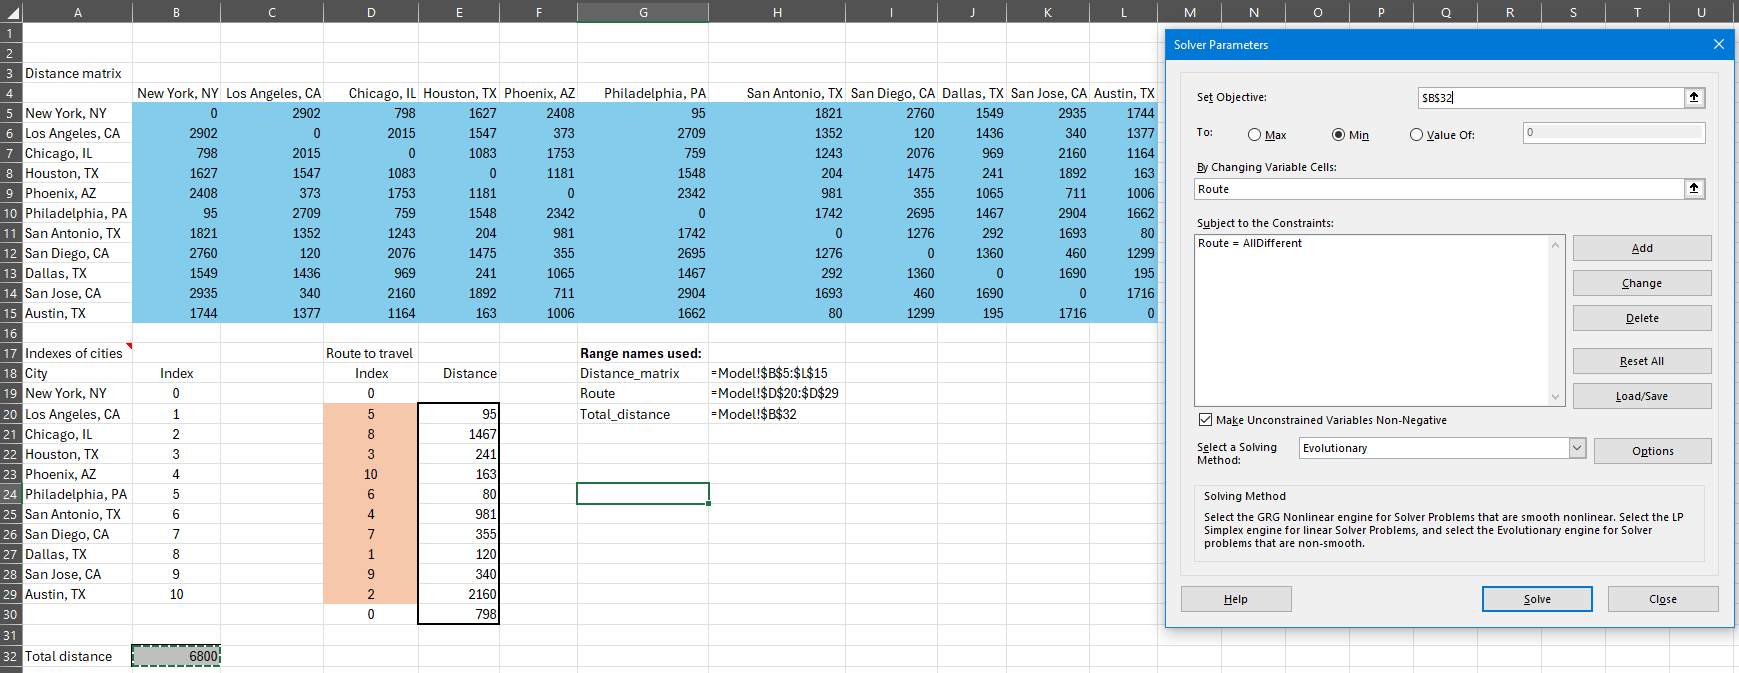

In [2]:
from IPython import display
display.Image("./M7_q3_screenshot.png")

# Part 4
## Solution Mapping (Excel)

Plot your solution (to #3 above) using your favorite online route mapping utility (e.g., mapquest.com), and include a screenshot of the route in your PDF report.

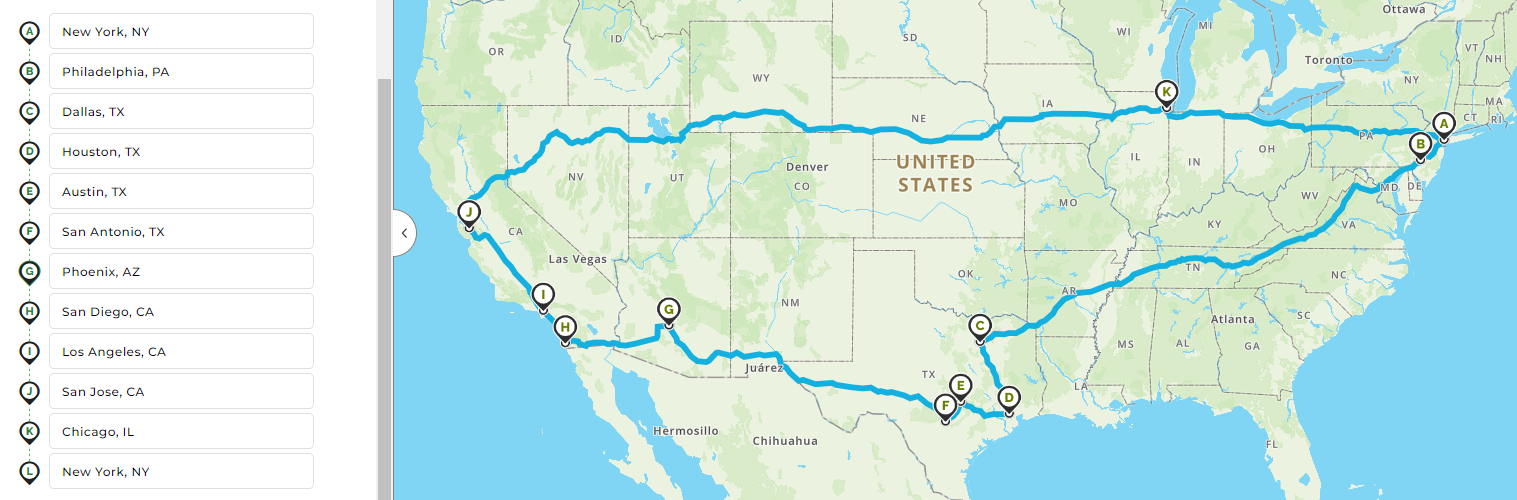

In [3]:
from IPython import display
display.Image("./M7_q4_screenshot.png")

# Part 5
## Heuristic Model (Greedy)

Develop a model to generate the Globetrotter’s tour using a greedy heuristic in Python. Ensure your model prints out the path and the distance traveled.

In [4]:
import pandas as pd

# pull data from excel file
file_name = 'buad5092-m7-heuristics-assignment-data.xlsx'
data = pd.read_excel(file_name, sheet_name=0, skiprows=1)

# establish city names and dictionary
cities = data['City'].tolist()
A = {}
for i, city in enumerate(cities):
    A[city] = []
    for j in range(2, len(data.columns)):
        destination_city = cities[j-2]
        distance = data.iloc[i, j]
        A[city].append([destination_city, distance])

# Initialize parameters
## source
s = 'New York, NY'
## large number, larger than the sum all distances
M = 200000
## path
x = [s]
## unvisited nodes
u = [city for city in cities if city != s]
## total distance
total_dist = 0

# loop until path reaches destination
while len(u) > 0:
    # reset closest distance to a large number
    dist = M
    # loop over nodes that are adjacent to the last node in the path
    for j in A[x[-1]]:
        # only consider unvisited nodes
        if j[0] in u:
            # choose the node that is closest
            if j[1] < dist:
                # save its label
                k = j[0]
                # save its distance
                dist = j[1]
    # add closest node to the path
    x.append(k)
    # ...and remove it from the unvisited nodes list
    u.remove(k)
    # increment total distance
    total_dist += dist

# add distance from the last node to the source
total_dist += A[x[-1]][0][1]
# add source to the end of the path
x.append(s)

# print solution
print("The path is: %s" % x)
print("The total distance is %s." % total_dist)


The path is: ['New York, NY', 'Philadelphia, PA', 'Chicago, IL', 'Dallas, TX', 'Austin, TX', 'San Antonio, TX', 'Houston, TX', 'Phoenix, AZ', 'San Diego, CA', 'Los Angeles, CA', 'San Jose, CA', 'New York, NY']
The total distance is 7233.


# Part 6
## Solution Mapping (Greedy)

Plot your solution (to #5 above) using your favorite online route mapping utility (e.g., mapquest.com), and include a screenshot of the route in your PDF report.

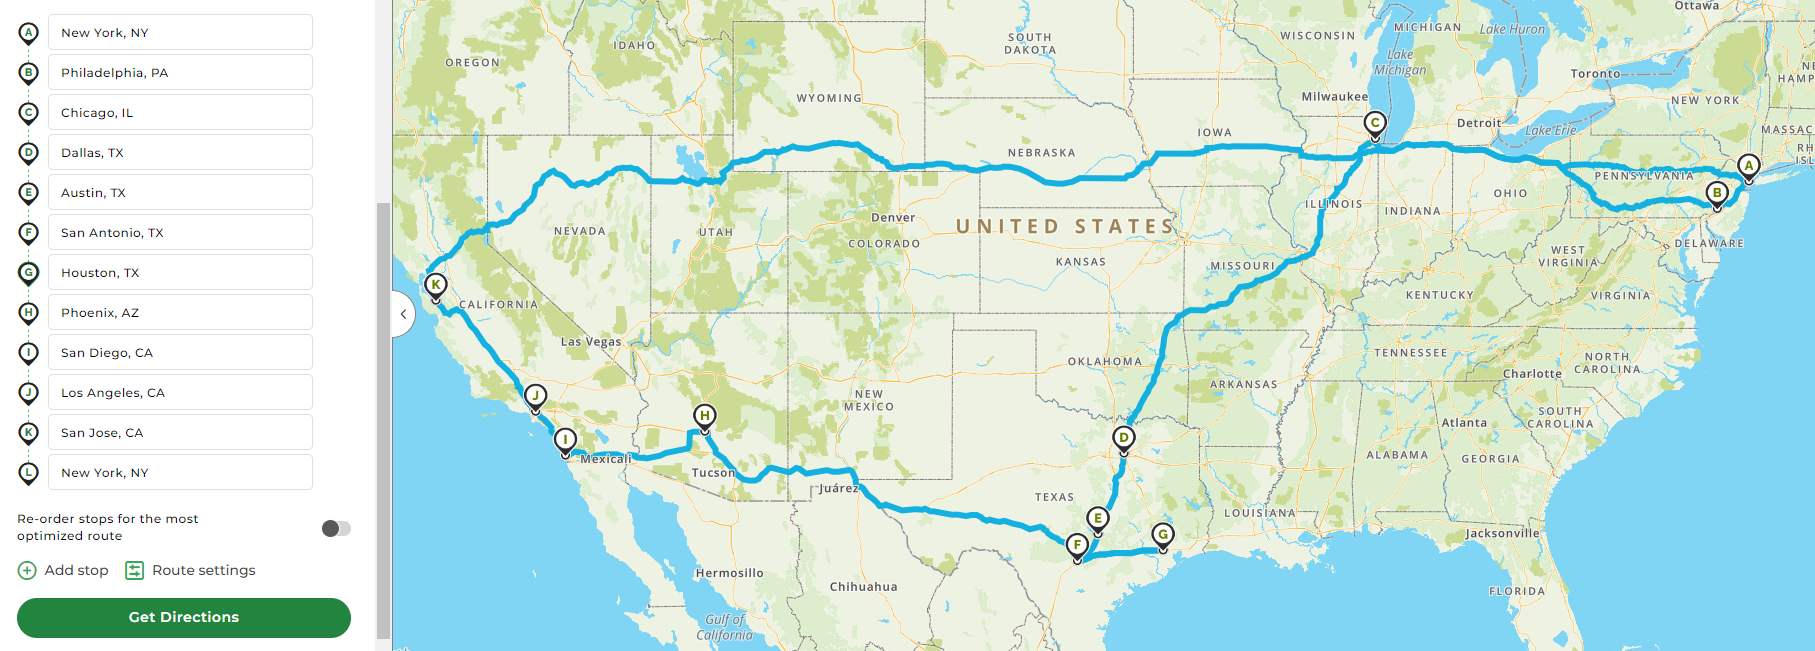

In [5]:
from IPython import display
display.Image("./M7_q6_screenshot.png")

# Part 7
## Analysis

**Heuristic algorithms are not guaranteed to produce the true optimal solution to a given problem. Do you think either the evolutionary solver or your greedy algorithm was able to produce the true optimal solution to this problem? Explain using the models, solutions, and diagrams you’ve produced.**

The results from the these methods demonstrate that the algorithms, such as the evolutionary solver and the greedy algorithm, do not always yield the optimal solution to the "Traveling Salesperson Problem (TSP)" . The relaxed problem in Excel produced a total distance of 3684 miles but resulted in several disconnected subtours, making it an invalid solution. The evolutionary solver in Excel generated a connected route with a total distance of 6800 miles, but as a heuristic method, it does not guarantee the optimal solution. The greedy algorithm in Python resulted in a total distance of 7233 miles, further illustrating its limitations by prioritizing local decisions (next closest city) that lead to a suboptimal overall path. These findings highlight the trade-offs between solution quality and computational efficiency in which heuristic methods are useful for generating good solutions quickly but may not always achieve the best possible outcome.